In [1]:
import pandas as pd
import pyodbc
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt

import numpy as np
import random

In [2]:
sales_conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=C:/Users/Tim/Desktop/GO-databases DEDS-week 4 & 5/go_sales.accdb;')
staff_conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=C:/Users/Tim/Desktop/GO-databases DEDS-week 4 & 5/go_staff.accdb;')
crm_conn = pyodbc.connect(r'Driver={Microsoft Access Driver (*.mdb, *.accdb)};DBQ=C:/Users/Tim/Desktop/GO-databases DEDS-week 4 & 5/go_crm.accdb;')

In [3]:
#read all tables needed
product = pd.read_sql("SELECT * FROM product", sales_conn)
types = pd.read_sql("SELECT * FROM product_type", sales_conn)
orders = pd.read_sql("SELECT * FROM order_header", sales_conn)
reden = pd.read_sql("SELECT * FROM return_reason", sales_conn)
order_details = pd.read_sql("SELECT * FROM order_details", sales_conn)
returned_item = pd.read_sql("SELECT * FROM returned_item", sales_conn)

C:\Users\Tim\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\Tim\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\Tim\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\Tim\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAP

In [4]:
product['PRODUCT_NUMBER'].isna().sum()

0

In [5]:
product['PRODUCT_NAME'].isna().sum()

5

In [6]:
product['PRODUCT_NAME'] = product['PRODUCT_NAME'].fillna('onbekend')
product['PRODUCT_NAME'].isna().sum()

0

In [7]:
subset_product_name_contains_husky = product.loc[(~product['PRODUCT_NAME'].isna()) & (product['PRODUCT_NAME'].str.contains('Husky')), :]
subset_product_name_contains_husky

,PRODUCT_NUMBER,INTRODUCTION_DATE,PRODUCT_TYPE_CODE,PRODUCTION_COST,MARGIN,PRODUCT_IMAGE,LANGUAGE,PRODUCT_NAME,DESCRIPTION
79,42,10-1-2021,6,106.66,None,P42ME2RP6.jpg,EN,Husky Rope 50,11 mm diameter standard rope. Length: 50 m. W...
80,43,10-1-2021,6,126.66,.33,P42ME2RP6.jpg,EN,Husky Rope 60,11 mm diameter standard rope. Length: 60 m. W...
81,44,10-1-2021,6,231.11,.33,P44ME2RP6.jpg,EN,Husky Rope 100,11 mm diameter standard rope. Length: 100 m. ...
82,45,10-1-2021,6,383.32,.33,P44ME2RP6.jpg,EN,Husky Rope 200,11 mm diameter standard rope. Length: 200 m. ...
84,47,.31,7,44.83,10-1-2021,P47ME2SY7.jpg,EN,Husky Harness,One size fits all due to extensive waist belt ...


In [8]:
product['PRODUCT_TYPE_CODE'].isna().sum()

6

In [9]:
product

,PRODUCT_NUMBER,INTRODUCTION_DATE,PRODUCT_TYPE_CODE,PRODUCTION_COST,MARGIN,PRODUCT_IMAGE,LANGUAGE,PRODUCT_NAME,DESCRIPTION
0,53,10-1-2021,8,28.55,.28,P53ME2CA8.jpg,EN,Firefly Climbing Lamp,This climbing lamp is water-resistant. It come...
1,54,10-1-2021,8,35.33,.33,P54ME2CA8.jpg,None,Firefly Charger,Power charger for the Firefly Climbing Lamp. T...
2,55,None,8,4,.5,P55ME2CA8.jpg,EN,Firefly Rechargeable Battery,Rechargeable battery pack for the Firefly Clim...
3,56,10-1-2021,8,9,.5,P56ME2CA8.jpg,None,Granite Chalk Bag,Nylon web bag perfect for holding several stic...
4,57,10-1-2021,9,40,.5,P57ME2TL9.jpg,EN,Granite Ice,A general purpose mountaineering axe for snow ...
...,...,...,...,...,...,...,...,...,...
110,108,27-12-2019,19,472.22,.43,None,EN,Lady Hailstorm Steel Woods Set,These steel woods are manufactured to exact to...
111,109,10-12-2019,20,35,.43,P109GE5PT20.jpg,EN,Course Pro Putter,High quality putter is cast from a soft yello...
112,110,Blue Steel Putter,20,60,.5,P110GE5PT20.jpg,EN,10-12-2019,This premium putter has copper mixed with ligh...
113,111,15-12-2019,20,81.8,P111GE5PT20.jpg,.55,EN,Blue Steel Max Putter,Putter head is composed from a single piece of...


In [10]:
types['PRODUCT_TYPE_EN'].isna().sum()

2

In [11]:
types.loc[types['PRODUCT_TYPE_EN'].isna(), :]

,PRODUCT_TYPE_CODE,PRODUCT_LINE_CODE,PRODUCT_TYPE_EN
5,6,2,None
6,7,2,None


In [12]:
types['PRODUCT_TYPE_EN'] = types['PRODUCT_TYPE_EN'].fillna('onbekend')
types['PRODUCT_TYPE_EN'].isna().sum()

0

In [13]:
types

,PRODUCT_TYPE_CODE,PRODUCT_LINE_CODE,PRODUCT_TYPE_EN
0,1,1,Cooking Gear
1,2,None,Tents
2,3,1,Sleeping Bags
3,4,1,Packs
4,5,1,Lanterns
5,6,2,onbekend
6,7,2,onbekend
7,8,2,Climbing Accessories
8,9,None,Tools
9,10,3,Watches


In [14]:
orders['ORDER_NUMBER'].isna().sum()

0

In [15]:
orders['RETAILER_NAME'].isna().sum()

167

In [16]:
orders['RETAILER_SITE_CODE'].isna().sum()

198

In [17]:
orders['ORDER_DATE'].isna().sum()

186

In [18]:
modus_retailer = orders['RETAILER_NAME'].mode()[0]

In [19]:
orders['RETAILER_NAME'] = orders['RETAILER_NAME'].fillna(modus_retailer)
orders['RETAILER_NAME'].isna().sum()

0

In [20]:
orders.loc[orders['RETAILER_SITE_CODE'].isna(), :]

,ORDER_NUMBER,RETAILER_NAME,RETAILER_SITE_CODE,RETAILER_CONTACT_CODE,SALES_STAFF_CODE,SALES_BRANCH_CODE,ORDER_DATE,ORDER_METHOD_CODE
13,1848,Sport & Freizeit,None,43,12,13,2021-12-03,2
64,1902,Extrem!,None,62,15,13,2021-07-14,7
67,1905,Der Fitness-Doktor,None,42,12,13,2022-08-17,2
159,2006,Sport & Freizeit,None,39,None,None,2021-11-19,7
196,2044,Die Fitness-Experten,None,56,16,14,2022-04-08,7
...,...,...,...,...,...,...,...,...
5211,9077,Jensen Mountaineering,None,400,115,36,2022-07-31,2
5257,9132,Grand choix,None,422,118,37,2021-08-02,5
5276,9151,Jensen Mountaineering,None,410,109,35,2020-07-30,5
5336,9219,"Chen Yu Enterprise Co.,",None,356,104,33,2020-02-03,4


In [21]:
subset = orders.loc[(~orders['RETAILER_NAME'].isna()) & (orders['RETAILER_NAME'].str.contains('Sport')), :]
subset

,ORDER_NUMBER,RETAILER_NAME,RETAILER_SITE_CODE,RETAILER_CONTACT_CODE,SALES_STAFF_CODE,SALES_BRANCH_CODE,ORDER_DATE,ORDER_METHOD_CODE
0,1831,Sport & Freizeit,36,52,15,13,2022-11-11,4
1,1832,Sport & Freizeit,38,43,12,13,2022-11-19,5
2,1833,Sport & Freizeit,40,60,12,13,2022-11-11,7
12,1847,Sport & Freizeit,36,52,15,13,2021-11-24,5
13,1848,Sport & Freizeit,None,43,12,13,2021-12-03,2
...,...,...,...,...,...,...,...,...
5296,9171,Beck's Sports Store,405,413,109,35,2022-07-14,7
5344,9227,Fu Chin Sport Equipment Co.,362,353,104,33,2020-01-05,2
5345,9228,Fu Chin Sport Equipment Co.,362,353,104,33,2020-10-24,1
5354,9237,Fu Chin Sport Equipment Co.,362,353,104,33,2021-01-22,7


In [22]:
orders['RETAILER_SITE_CODE'] = orders['RETAILER_SITE_CODE'].fillna('onbekend')
orders['RETAILER_SITE_CODE'].isna().sum()

0

In [23]:
orders['ORDER_DATE'] = orders['ORDER_DATE'].fillna('onbekend')
orders['ORDER_DATE'].isna().sum()

0

In [24]:
orders

,ORDER_NUMBER,RETAILER_NAME,RETAILER_SITE_CODE,RETAILER_CONTACT_CODE,SALES_STAFF_CODE,SALES_BRANCH_CODE,ORDER_DATE,ORDER_METHOD_CODE
0,1831,Sport & Freizeit,36,52,15,13,2022-11-11 00:00:00,4
1,1832,Sport & Freizeit,38,43,12,13,2022-11-19 00:00:00,5
2,1833,Sport & Freizeit,40,60,12,13,2022-11-11 00:00:00,7
3,1834,Die Zeltstadt,47,40,15,13,2022-11-15 00:00:00,None
4,1835,Die Zeltstadt,48,57,12,13,2022-12-14 00:00:00,7
...,...,...,...,...,...,...,...,...
5355,9238,Fu Chin Sport Equipment Co.,362,353,104,33,2021-10-17 00:00:00,5
5356,9239,"Chen Yu Enterprise Co.,",365,356,104,33,2022-02-16 00:00:00,2
5357,9240,"Chen Yu Enterprise Co.,",365,356,104,33,2022-10-12 00:00:00,7
5358,9241,"Chen Yu Enterprise Co.,",363,354,104,33,2022-01-20 00:00:00,7


In [25]:
reden

,RETURN_REASON_CODE,RETURN_DESCRIPTION_EN
0,1,Defective product
1,2,Incomplete product
2,3,Wrong product ordered
3,4,Wrong product shipped
4,5,Unsatisfactory product


In [26]:
order_details

,ORDER_DETAIL_CODE,ORDER_NUMBER,PRODUCT_NUMBER,QUANTITY,UNIT_COST,UNIT_PRICE,UNIT_SALE_PRICE
0,78.37,1258,17,92.0,60.29,84.41,48616
1,48617,1352,None,190.0,60.29,84.41,67.08
2,48618,1544,17,82.0,60.29,84.41,78.37
3,48619,1249,17,190.0,60.29,84.41,72.26
4,48620,1268,17,152.0,60.29,84.41,78.05
...,...,...,...,...,...,...,...
43058,102951,8614,11,16.0,250,350,325
43059,102952,8611,11,18.0,250,350,350
43060,102953,8591,11,18.0,250,350,325
43061,102954,8619,11,18.0,250,350,350


In [27]:
order_details['ORDER_DETAIL_CODE'].isna().sum()

0

In [28]:
order_details['ORDER_NUMBER'].isna().sum()

1746

In [29]:
order_details['PRODUCT_NUMBER'].isna().sum()

1757

In [30]:
order_details['UNIT_COST'].isna().sum()

1659

In [31]:
order_details['UNIT_PRICE'].isna().sum()

1712

In [32]:
order_details['UNIT_SALE_PRICE'].isna().sum()

1712

In [33]:
#skip de continues data

In [34]:
returned_item

,RETURN_CODE,RETURN_DATE,ORDER_DETAIL_CODE,RETURN_REASON_CODE,RETURN_QUANTITY
0,1491,1-8-2021 04:10:24,84858,None,8
1,1492,6-12-2020 18:46:19,84440,2,2
2,1493,22,84867,4,24-6-2021 09:23:14
3,21-7-2021 00:00:09,1494,84873,3,20
4,1496,7-10-2020 05:13:58,84488,None,2
...,...,...,...,...,...
701,2465,24,114972,3,6-6-2021 09:22:12
702,2466,6-10-2021 12:31:25,114983,5,66
703,2467,31-3-2022 15:39:38,115215,4,64
704,2468,23-12-2022 19:48:50,None,1,2


In [35]:
returned_item['RETURN_CODE'].isna().sum()

0

In [36]:
returned_item['RETURN_REASON_CODE'].isna().sum()

30

In [37]:
returned_item['RETURN_QUANTITY'].isna().sum()

41

In [38]:
returned_item.loc[returned_item['RETURN_REASON_CODE'].isna(), :]

,RETURN_CODE,RETURN_DATE,ORDER_DETAIL_CODE,RETURN_REASON_CODE,RETURN_QUANTITY
0,1491,1-8-2021 04:10:24,84858,None,8
4,1496,7-10-2020 05:13:58,84488,None,2
28,1529,26-8-2021 08:22:41,111150,None,10
33,1535,10-8-2022 04:10:23,112039,None,4
48,1565,25-1-2020 17:44:16,47776,None,3
93,1618,14-10-2022 11:29:22,110518,None,2
131,1668,29-11-2021 01:04:44,107586,None,4
146,1684,2-8-2020 13:35:31,106563,None,2
181,1733,10-9-2021 19:48:21,53663,None,2
185,1738,7-1-2022 23:59:38,53714,None,2


In [39]:
returned_item['RETURN_REASON_CODE'] = returned_item['RETURN_REASON_CODE'].fillna('onbekend')
returned_item['RETURN_REASON_CODE'].isna().sum()

0

In [40]:
product.dtypes

PRODUCT_NUMBER       object
INTRODUCTION_DATE    object
PRODUCT_TYPE_CODE    object
PRODUCTION_COST      object
MARGIN               object
PRODUCT_IMAGE        object
LANGUAGE             object
PRODUCT_NAME         object
DESCRIPTION          object
dtype: object

In [41]:
types.dtypes

PRODUCT_TYPE_CODE    object
PRODUCT_LINE_CODE    object
PRODUCT_TYPE_EN      object
dtype: object

In [42]:
orders.dtypes

ORDER_NUMBER             object
RETAILER_NAME            object
RETAILER_SITE_CODE       object
RETAILER_CONTACT_CODE    object
SALES_STAFF_CODE         object
SALES_BRANCH_CODE        object
ORDER_DATE               object
ORDER_METHOD_CODE        object
dtype: object

In [43]:
reden.dtypes

RETURN_REASON_CODE       object
RETURN_DESCRIPTION_EN    object
dtype: object

In [44]:
order_details.dtypes

ORDER_DETAIL_CODE     object
ORDER_NUMBER          object
PRODUCT_NUMBER        object
QUANTITY             float64
UNIT_COST             object
UNIT_PRICE            object
UNIT_SALE_PRICE       object
dtype: object

In [45]:
returned_item.dtypes

RETURN_CODE           object
RETURN_DATE           object
ORDER_DETAIL_CODE     object
RETURN_REASON_CODE    object
RETURN_QUANTITY       object
dtype: object

In [46]:
numeric_columns = ['PRODUCT_NUMBER', 'PRODUCT_TYPE_CODE', 'PRODUCTION_COST', 'MARGIN']
non_numeric_columns = list(product.drop(numeric_columns, axis = 1).columns)

In [47]:
wrong_index_dict = dict()

for index in product.index:
    wrong_index_dict[index] = []


In [48]:
for numeric_column in numeric_columns:
    #Stringwaarden vinden in numerieke kolommen:
    wrong_rows = product.loc[pd.to_numeric(product[numeric_column], errors = 'coerce').isnull(), [numeric_column]]
    
    for index, row in wrong_rows.iterrows():
        wrong_index_dict[index].append(numeric_column)
    
for non_numeric_column in non_numeric_columns:
    #Numerieke waarden vinden in stringkolommen
    wrong_rows = product.loc[~pd.to_numeric(product[non_numeric_column], errors = 'coerce').isnull(), [non_numeric_column]]
    
    for index, row in wrong_rows.iterrows():
        wrong_index_dict[index].append(non_numeric_column)
    

In [49]:
for key_value_pair in list(wrong_index_dict.items()):
    
    if len(key_value_pair[1]) ==2: #Als er minstens 1 item gevuld is op de index...
        index = key_value_pair[0]
        kolom1 = key_value_pair[1][0]
        kolom2 = key_value_pair[1][1]
        
        
        product.loc[product.index == index, [kolom1, kolom2]] = product.loc[product.index == index, [kolom2, kolom1]].values

product

,PRODUCT_NUMBER,INTRODUCTION_DATE,PRODUCT_TYPE_CODE,PRODUCTION_COST,MARGIN,PRODUCT_IMAGE,LANGUAGE,PRODUCT_NAME,DESCRIPTION
0,53,10-1-2021,8,28.55,.28,P53ME2CA8.jpg,EN,Firefly Climbing Lamp,This climbing lamp is water-resistant. It come...
1,54,10-1-2021,8,35.33,.33,P54ME2CA8.jpg,None,Firefly Charger,Power charger for the Firefly Climbing Lamp. T...
2,55,None,8,4,.5,P55ME2CA8.jpg,EN,Firefly Rechargeable Battery,Rechargeable battery pack for the Firefly Clim...
3,56,10-1-2021,8,9,.5,P56ME2CA8.jpg,None,Granite Chalk Bag,Nylon web bag perfect for holding several stic...
4,57,10-1-2021,9,40,.5,P57ME2TL9.jpg,EN,Granite Ice,A general purpose mountaineering axe for snow ...
...,...,...,...,...,...,...,...,...,...
110,108,27-12-2019,19,472.22,.43,None,EN,Lady Hailstorm Steel Woods Set,These steel woods are manufactured to exact to...
111,109,10-12-2019,20,35,.43,P109GE5PT20.jpg,EN,Course Pro Putter,High quality putter is cast from a soft yello...
112,110,Blue Steel Putter,20,60,.5,P110GE5PT20.jpg,EN,10-12-2019,This premium putter has copper mixed with ligh...
113,111,15-12-2019,20,81.8,.55,P111GE5PT20.jpg,EN,Blue Steel Max Putter,Putter head is composed from a single piece of...


In [50]:
numeric_columns = ['PRODUCT_TYPE_CODE', 'PRODUCT_LINE_CODE']
non_numeric_columns = list(types.drop(numeric_columns, axis = 1).columns)

In [51]:
wrong_index_dict = dict()

for index in types.index:
    wrong_index_dict[index] = []


In [52]:
for numeric_column in numeric_columns:
    #Stringwaarden vinden in numerieke kolommen:
    wrong_rows = types.loc[pd.to_numeric(types[numeric_column], errors = 'coerce').isnull(), [numeric_column]]
    
    for index, row in wrong_rows.iterrows():
        wrong_index_dict[index].append(numeric_column)
    
for non_numeric_column in non_numeric_columns:
    #Numerieke waarden vinden in stringkolommen
    wrong_rows = types.loc[~pd.to_numeric(types[non_numeric_column], errors = 'coerce').isnull(), [non_numeric_column]]
    
    for index, row in wrong_rows.iterrows():
        wrong_index_dict[index].append(non_numeric_column)


In [53]:
for key_value_pair in list(wrong_index_dict.items()):
    
    if len(key_value_pair[1])==2: #Als er minstens 1 item gevuld is op de index...
        index = key_value_pair[0]
        kolom1 = key_value_pair[1][0]
        kolom2 = key_value_pair[1][1]
        
        
        types.loc[types.index == index, [kolom1, kolom2]] = types.loc[types.index == index, [kolom2, kolom1]].values

types

,PRODUCT_TYPE_CODE,PRODUCT_LINE_CODE,PRODUCT_TYPE_EN
0,1,1,Cooking Gear
1,2,None,Tents
2,3,1,Sleeping Bags
3,4,1,Packs
4,5,1,Lanterns
5,6,2,onbekend
6,7,2,onbekend
7,8,2,Climbing Accessories
8,9,None,Tools
9,10,3,Watches


In [54]:
numeric_columns = ['RETURN_REASON_CODE']
non_numeric_columns = list(reden.drop(numeric_columns, axis = 1).columns)

In [55]:
wrong_index_dict = dict()

for index in reden.index:
    wrong_index_dict[index] = []

In [56]:
for numeric_column in numeric_columns:
    #Stringwaarden vinden in numerieke kolommen:
    wrong_rows = reden.loc[pd.to_numeric(reden[numeric_column], errors = 'coerce').isnull(), [numeric_column]]
    
    for index, row in wrong_rows.iterrows():
        wrong_index_dict[index].append(numeric_column)
    
for non_numeric_column in non_numeric_columns:
    #Numerieke waarden vinden in stringkolommen
    wrong_rows = reden.loc[~pd.to_numeric(reden[non_numeric_column], errors = 'coerce').isnull(), [non_numeric_column]]
    
    for index, row in wrong_rows.iterrows():
        wrong_index_dict[index].append(non_numeric_column)

In [57]:
for key_value_pair in list(wrong_index_dict.items()):
    
    if len(key_value_pair[1])==2: #Als er minstens 1 item gevuld is op de index...
        index = key_value_pair[0]
        kolom1 = key_value_pair[1][0]
        kolom2 = key_value_pair[1][1]
        
        
        reden.loc[reden.index == index, [kolom1, kolom2]] = reden.loc[reden.index == index, [kolom2, kolom1]].values

reden

,RETURN_REASON_CODE,RETURN_DESCRIPTION_EN
0,1,Defective product
1,2,Incomplete product
2,3,Wrong product ordered
3,4,Wrong product shipped
4,5,Unsatisfactory product


In [58]:
numeric_columns = ['ORDER_NUMBER', 'RETAILER_SITE_CODE', 'RETAILER_CONTACT_CODE', 'SALES_STAFF_CODE', 'SALES_BRANCH_CODE', 'ORDER_METHOD_CODE']
non_numeric_columns = list(orders.drop(numeric_columns, axis = 1).columns)

In [59]:
wrong_index_dict = dict()

for index in orders.index:
    wrong_index_dict[index] = []

In [60]:
for numeric_column in numeric_columns:
    #Stringwaarden vinden in numerieke kolommen:
    wrong_rows = orders.loc[pd.to_numeric(orders[numeric_column], errors = 'coerce').isnull(), [numeric_column]]
    
    for index, row in wrong_rows.iterrows():
        wrong_index_dict[index].append(numeric_column)
    
for non_numeric_column in non_numeric_columns:
    #Numerieke waarden vinden in stringkolommen
    wrong_rows = orders.loc[~pd.to_numeric(orders[non_numeric_column], errors = 'coerce').isnull(), [non_numeric_column]]
    
    for index, row in wrong_rows.iterrows():
        wrong_index_dict[index].append(non_numeric_column)

In [61]:
for key_value_pair in list(wrong_index_dict.items()):
    
    if len(key_value_pair[1])==2: #Als er minstens 1 item gevuld is op de index...
        index = key_value_pair[0]
        kolom1 = key_value_pair[1][0]
        kolom2 = key_value_pair[1][1]
        
        
        orders.loc[orders.index == index, [kolom1, kolom2]] = orders.loc[orders.index == index, [kolom2, kolom1]].values

orders

,ORDER_NUMBER,RETAILER_NAME,RETAILER_SITE_CODE,RETAILER_CONTACT_CODE,SALES_STAFF_CODE,SALES_BRANCH_CODE,ORDER_DATE,ORDER_METHOD_CODE
0,1831,Sport & Freizeit,36,52,15,13,2022-11-11 00:00:00,4
1,1832,Sport & Freizeit,38,43,12,13,2022-11-19 00:00:00,5
2,1833,Sport & Freizeit,40,60,12,13,2022-11-11 00:00:00,7
3,1834,Die Zeltstadt,47,40,15,13,2022-11-15 00:00:00,None
4,1835,Die Zeltstadt,48,57,12,13,2022-12-14 00:00:00,7
...,...,...,...,...,...,...,...,...
5355,9238,Fu Chin Sport Equipment Co.,362,353,104,33,2021-10-17 00:00:00,5
5356,9239,"Chen Yu Enterprise Co.,",365,356,104,33,2022-02-16 00:00:00,2
5357,9240,"Chen Yu Enterprise Co.,",365,356,104,33,2022-10-12 00:00:00,7
5358,9241,"Chen Yu Enterprise Co.,",363,354,104,33,2022-01-20 00:00:00,7


In [62]:
numeric_columns = ['ORDER_DETAIL_CODE', 'ORDER_NUMBER', 'PRODUCT_NUMBER', 'QUANTITY', 'UNIT_COST', 'UNIT_PRICE', 'UNIT_SALE_PRICE']
non_numeric_columns = list(order_details.drop(numeric_columns, axis = 1).columns)

In [63]:
wrong_index_dict = dict()

for index in order_details.index:
    wrong_index_dict[index] = []

In [64]:
for numeric_column in numeric_columns:
    #Stringwaarden vinden in numerieke kolommen:
    wrong_rows = order_details.loc[pd.to_numeric(order_details[numeric_column], errors = 'coerce').isnull(), [numeric_column]]
    
    for index, row in wrong_rows.iterrows():
        wrong_index_dict[index].append(numeric_column)
    
for non_numeric_column in non_numeric_columns:
    #Numerieke waarden vinden in stringkolommen
    wrong_rows = order_details.loc[~pd.to_numeric(order_details[non_numeric_column], errors = 'coerce').isnull(), [non_numeric_column]]
    
    for index, row in wrong_rows.iterrows():
        wrong_index_dict[index].append(non_numeric_column)


In [65]:
for key_value_pair in list(wrong_index_dict.items()):
    
    if len(key_value_pair[1])==2: #Als er minstens 1 item gevuld is op de index...
        index = key_value_pair[0]
        kolom1 = key_value_pair[1][0]
        kolom2 = key_value_pair[1][1]
        
        
        order_details.loc[order_details.index == index, [kolom1, kolom2]] = order_details.loc[order_details.index == index, [kolom2, kolom1]].values

order_details

,ORDER_DETAIL_CODE,ORDER_NUMBER,PRODUCT_NUMBER,QUANTITY,UNIT_COST,UNIT_PRICE,UNIT_SALE_PRICE
0,78.37,1258,17,92.0,60.29,84.41,48616
1,48617,1352,None,190.0,60.29,84.41,67.08
2,48618,1544,17,82.0,60.29,84.41,78.37
3,48619,1249,17,190.0,60.29,84.41,72.26
4,48620,1268,17,152.0,60.29,84.41,78.05
...,...,...,...,...,...,...,...
43058,102951,8614,11,16.0,250,350,325
43059,102952,8611,11,18.0,250,350,350
43060,102953,8591,11,18.0,250,350,325
43061,102954,8619,11,18.0,250,350,350


In [84]:
numeric_columns = ['RETURN_CODE', 'ORDER_DETAIL_CODE', 'RETURN_REASON_CODE', 'RETURN_QUANTITY']
non_numeric_columns = list(returned_item.drop(numeric_columns, axis = 1).columns)
non_numeric_columns


['RETURN_DATE']

In [67]:
wrong_index_dict = dict()

for index in returned_item.index:
    wrong_index_dict[index] = []

In [68]:
for numeric_column in numeric_columns:
    #Stringwaarden vinden in numerieke kolommen:
    wrong_rows = returned_item.loc[pd.to_numeric(returned_item[numeric_column], errors = 'coerce').isnull(), [numeric_column]]
    
    for index, row in wrong_rows.iterrows():
        wrong_index_dict[index].append(numeric_column)
    
for non_numeric_column in non_numeric_columns:
    #Numerieke waarden vinden in stringkolommen
    wrong_rows = returned_item.loc[~pd.to_numeric(returned_item[non_numeric_column], errors = 'coerce').isnull(), [non_numeric_column]]
    
    for index, row in wrong_rows.iterrows():
        wrong_index_dict[index].append(non_numeric_column)


In [69]:
for key_value_pair in list(wrong_index_dict.items()):
    
    if len(key_value_pair[1])==2: #Als er minstens 1 item gevuld is op de index...
        index = key_value_pair[0]
        kolom1 = key_value_pair[1][0]
        kolom2 = key_value_pair[1][1]
        
        
        returned_item.loc[returned_item.index == index, [kolom1, kolom2]] = returned_item.loc[returned_item.index == index, [kolom2, kolom1]].values

returned_item

,RETURN_CODE,RETURN_DATE,ORDER_DETAIL_CODE,RETURN_REASON_CODE,RETURN_QUANTITY
0,1491,1-8-2021 04:10:24,84858,onbekend,8
1,1492,6-12-2020 18:46:19,84440,2,2
2,1493,24-6-2021 09:23:14,84867,4,22
3,1494,21-7-2021 00:00:09,84873,3,20
4,1496,7-10-2020 05:13:58,84488,onbekend,2
...,...,...,...,...,...
701,2465,6-6-2021 09:22:12,114972,3,24
702,2466,6-10-2021 12:31:25,114983,5,66
703,2467,31-3-2022 15:39:38,115215,4,64
704,2468,23-12-2022 19:48:50,None,1,2


In [70]:
joined = pd.merge(product, types, on = 'PRODUCT_TYPE_CODE', how = 'inner')
feit = pd.merge(returned_item, order_details, on = 'ORDER_DETAIL_CODE', how = 'inner')
feiten = pd.merge(feit, orders, on = 'ORDER_NUMBER', how = 'inner')

In [71]:
product_ster = joined.drop(['LANGUAGE','PRODUCT_IMAGE','INTRODUCTION_DATE','PRODUCTION_COST','MARGIN','DESCRIPTION','PRODUCT_LINE_CODE'], axis = 1)
verkoper = orders.drop(['RETAILER_CONTACT_CODE', 'SALES_STAFF_CODE', 'SALES_BRANCH_CODE', 'ORDER_DATE', 'ORDER_METHOD_CODE'], axis = 1)
reden = reden
datum = orders.drop(['ORDER_NUMBER', 'RETAILER_NAME', 'RETAILER_SITE_CODE', 'RETAILER_CONTACT_CODE', 'SALES_STAFF_CODE', 'SALES_BRANCH_CODE', 'ORDER_METHOD_CODE'], axis = 1)
returned_producten = feiten.drop(['RETURN_DATE', 'QUANTITY', 'RETAILER_NAME', 'RETAILER_SITE_CODE', 'RETAILER_CONTACT_CODE', 'SALES_STAFF_CODE', 'SALES_BRANCH_CODE', 'ORDER_METHOD_CODE'], axis = 1)

In [72]:
#datum["YEAR"] = datum["ORDER_DATE"].dt.year
#datum["MONTH"] = datum["ORDER_DATE"].dt.month
#datum["DAY"] = datum["ORDER_DATE"].dt.day

In [73]:
product_ster

,PRODUCT_NUMBER,PRODUCT_TYPE_CODE,PRODUCT_NAME,PRODUCT_TYPE_EN
0,53,8,Firefly Climbing Lamp,Climbing Accessories
1,54,8,Firefly Charger,Climbing Accessories
2,55,8,Firefly Rechargeable Battery,Climbing Accessories
3,56,8,Granite Chalk Bag,Climbing Accessories
4,50,8,Granite Carabiner,Climbing Accessories
...,...,...,...,...
104,107,19,Lady Hailstorm Titanium Woods Set,Woods
105,108,19,Lady Hailstorm Steel Woods Set,Woods
106,109,20,Course Pro Putter,Putters
107,110,20,10-12-2019,Putters


In [74]:
verkoper

,ORDER_NUMBER,RETAILER_NAME,RETAILER_SITE_CODE
0,1831,Sport & Freizeit,36
1,1832,Sport & Freizeit,38
2,1833,Sport & Freizeit,40
3,1834,Die Zeltstadt,47
4,1835,Die Zeltstadt,48
...,...,...,...
5355,9238,Fu Chin Sport Equipment Co.,362
5356,9239,"Chen Yu Enterprise Co.,",365
5357,9240,"Chen Yu Enterprise Co.,",365
5358,9241,"Chen Yu Enterprise Co.,",363


In [75]:
reden

,RETURN_REASON_CODE,RETURN_DESCRIPTION_EN
0,1,Defective product
1,2,Incomplete product
2,3,Wrong product ordered
3,4,Wrong product shipped
4,5,Unsatisfactory product


In [76]:
datum

,ORDER_DATE
0,2022-11-11 00:00:00
1,2022-11-19 00:00:00
2,2022-11-11 00:00:00
3,2022-11-15 00:00:00
4,2022-12-14 00:00:00
...,...
5355,2021-10-17 00:00:00
5356,2022-02-16 00:00:00
5357,2022-10-12 00:00:00
5358,2022-01-20 00:00:00


In [77]:
returned_producten

,RETURN_CODE,ORDER_DETAIL_CODE,RETURN_REASON_CODE,RETURN_QUANTITY,ORDER_NUMBER,PRODUCT_NUMBER,UNIT_COST,UNIT_PRICE,UNIT_SALE_PRICE,ORDER_DATE
0,1491,84858,onbekend,8,7446,6,87.63,123.56,123.56,2021-07-23 00:00:00
1,1492,84440,2,2,7316,8,151.77,151.77,88.23,2020-10-18 00:00:00
2,1493,84867,4,22,7359,8,78.26,134.63,134.63,2021-06-12 00:00:00
3,1494,84873,3,20,7448,8,None,134.63,126.16,2021-07-16 00:00:00
4,1496,84488,onbekend,2,7438,17,64.36,90.09,90.09,2020-08-23 00:00:00
...,...,...,...,...,...,...,...,...,...,...
639,2459,114921,1,None,7625,33,18.2,27.3,None,2021-05-17 00:00:00
640,2465,114972,3,24,7625,66,69.68,92.91,46.45,2021-05-17 00:00:00
641,2464,114967,1,12,7623,63,30.63,45.97,38.31,2021-10-14 00:00:00
642,2466,114983,5,66,7622,71,60.5,90.76,75.63,2021-09-26 00:00:00


In [78]:
returned_producten['RETURN_QUANTITY'].isna().sum()

36

In [79]:
returned_producten['UNIT_COST'].isna().sum()

30

In [80]:
returned_producten['UNIT_PRICE'].isna().sum()

25

In [81]:
returned_producten['UNIT_SALE_PRICE'].isna().sum()

23

In [83]:
returned_producten['RETURN_QUANTITY'] = returned_producten['RETURN_QUANTITY'].astype(float)

ValueError: could not convert string to float: '31-10-2022 02:06:18'

In [85]:
returned_producten['UNIT_COST'] = returned_producten['UNIT_COST'].astype(float)

In [86]:
returned_producten['UNIT_PRICE'] = returned_producten['UNIT_PRICE'].astype(float)

In [87]:
returned_producten['UNIT_SALE_PRICE'] = returned_producten['UNIT_SALE_PRICE'].astype(float)

In [92]:
returned_producten.loc[~returned_producten['UNIT_COST'].isna(), ['UNIT_COST']]

,UNIT_COST
0,87.63
1,151.77
2,78.26
3,34.36
4,64.36
...,...
639,18.20
640,69.68
641,30.63
642,60.50


In [93]:
returned_producten.loc[~returned_producten['UNIT_PRICE'].isna(), ['UNIT_PRICE']]

,UNIT_PRICE
0,123.56
1,151.77
2,134.63
3,134.63
4,90.09
...,...
639,27.30
640,92.91
641,45.97
642,90.76


In [94]:
returned_producten.loc[~returned_producten['UNIT_SALE_PRICE'].isna(), ['UNIT_SALE_PRICE']]

,UNIT_SALE_PRICE
0,123.56
1,88.23
2,134.63
3,126.16
4,90.09
...,...
639,46.00
640,46.45
641,38.31
642,75.63


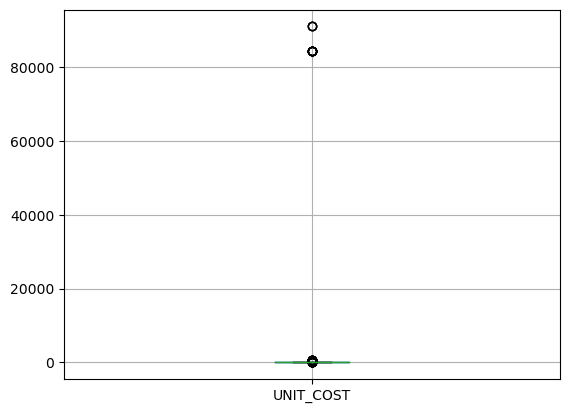

In [95]:
returned_producten.loc[~returned_producten['UNIT_COST'].isna(), ['UNIT_COST']].boxplot()
plt.show()

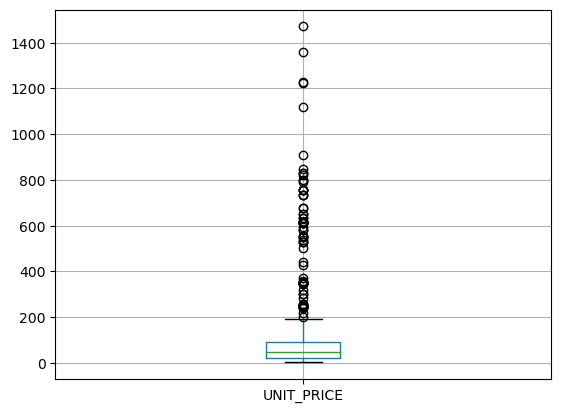

In [96]:
returned_producten.loc[~returned_producten['UNIT_PRICE'].isna(), ['UNIT_PRICE']].boxplot()
plt.show()

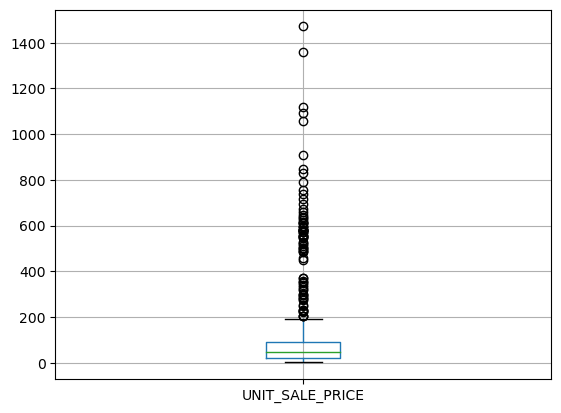

In [97]:
returned_producten.loc[~returned_producten['UNIT_SALE_PRICE'].isna(), ['UNIT_SALE_PRICE']].boxplot()
plt.show()

In [89]:
median_margin = np.median(returned_producten.loc[~returned_producten['UNIT_COST'].isna(), ['UNIT_COST']])
returned_producten['UNIT_COST'] = returned_producten['UNIT_COST'].fillna(median_margin)
returned_producten['UNIT_COST'].isna().sum()

0

In [90]:
median_margin = np.median(returned_producten.loc[~returned_producten['UNIT_PRICE'].isna(), ['UNIT_PRICE']])
returned_producten['UNIT_PRICE'] = returned_producten['UNIT_PRICE'].fillna(median_margin)
returned_producten['UNIT_PRICE'].isna().sum()

0

In [91]:
median_margin = np.median(returned_producten.loc[~returned_producten['UNIT_SALE_PRICE'].isna(), ['UNIT_SALE_PRICE']])
returned_producten['UNIT_SALE_PRICE'] = returned_producten['UNIT_SALE_PRICE'].fillna(median_margin)
returned_producten['UNIT_SALE_PRICE'].isna().sum()

0

In [ ]:
returned_producten.to_excel(r'C:\Users\Tim\Desktop\Python\returned_item.xlsx', sheet_name='returned_producten', index = False)
reden.to_excel(r'C:\Users\Tim\Desktop\Python\reden.xlsx', sheet_name='reden', index = False)
verkoper.to_excel(r'C:\Users\Tim\Desktop\Python\verkoper.xlsx', sheet_name='verkoper', index = False)
datum.to_excel(r'C:\Users\Tim\Desktop\Python\datum.xlsx', sheet_name='datum', index = False)
product_ster.to_excel(r'C:\Users\Tim\Desktop\Python\product.xlsx', sheet_name='product_ster', index = False)